1.

La raiz encontrada con el metodo 2.0000


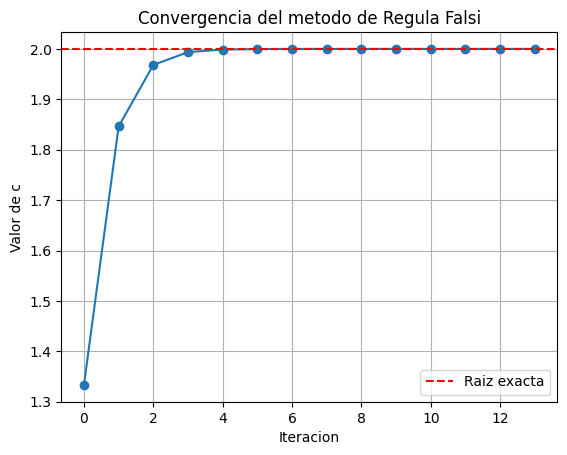

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def regula_falsi(f, a, b, tol=1e-8, max_iter=500):
    c_anterior = []

    if f(a) * f(b) >= 0:
        raise ValueError("El intervalo no es válido: f(a) y f(b) deben tener signos opuestos")

    for i in range(max_iter):
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))
        c_anterior.append(c)

        fc = f(c)

        if abs(fc) < tol:
            return c, c_anterior, i + 1

        if fc * f(a) < 0:
            b = c
        else:
            a = c

    raise RuntimeError(f"No se encontró la raíz después de {max_iter} iteraciones")
f = lambda x: x**2-4
raiz, valores_c, iteraciones = regula_falsi(f, a=0, b=3, tol=1e-8)
print(f'La raiz encontrada con el metodo {raiz:.4f}')
plt.plot(valores_c, marker='o')
plt.axhline(2, color='red', linestyle='--', label='Raiz exacta')
plt.title("Convergencia del metodo de Regula Falsi")
plt.xlabel("Iteracion")
plt.ylabel("Valor de c")
plt.legend()
plt.grid(True)
plt.show()

2.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

e0 = 8.854187817e-12
q = 2e-5
Q = 2e-5
def fuerza_anillo(x, a):
    return (1 / (4 * np.pi * e0)) * (q * Q * x) / ((x**2 + a**2)**(3/2))

x = float(input("Ingrese el valor de x en metros: "))
a = float(input("Ingrese el valor del radio a en metros: "))

fuerza = fuerza_anillo(x, a)

print(f"La fuerza sobre la carga q es F = {fuerza:.4e} N")

Ingrese el valor de x en metros: 5
Ingrese el valor del radio a en metros: 5
La fuerza sobre la carga q es F = 5.0841e-02 N


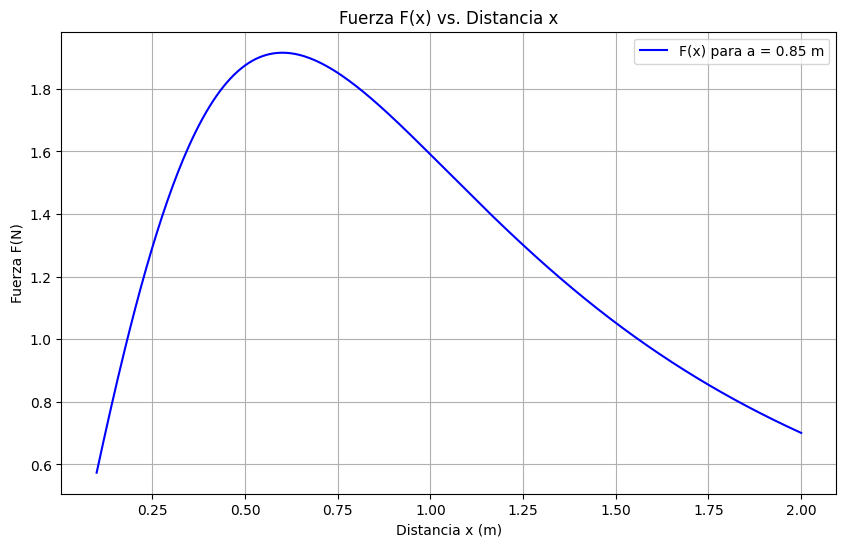

In [14]:
x_valores = np.linspace(0.1, 2.0, 400)

F_valores = [fuerza_anillo(x, 0.85) for x in x_valores]

plt.figure(figsize=(10, 6))
plt.plot(x_valores, F_valores, label=f'F(x) para a = {0.85} m', color='blue')
plt.title('Fuerza F(x) vs. Distancia x')
plt.xlabel('Distancia x (m)')
plt.ylabel('Fuerza F(N)')
plt.grid(True)
plt.legend()
plt.show()

In [3]:
def newton(f,df,x0,tol=1e-4,max_iter=100):
  aproximaciones=[]
  for _ in range(max_iter):
    f_x0=f(x0)
    df_x0=df(x0)
    if df_x0 == 0:
      raise ValueError(' Division por 0')
    x1=x0-f_x0/df_x0
    aproximaciones.append(x1)
    if abs(x1-x0)<tol:
      return x1, aproximaciones
    x0=x1
  raise RuntimeError('No llego a la raiz en el numero de iterasiones')
a = 0.85
f = lambda x: ((1 / (4 * np.pi * e0)) * (q * Q * x) / ((x**2 + a**2)**(3/2))) - 1.25
df = lambda x:(1 / (4 * np.pi * e0)) * (q * Q * (a**2 - 2 * x**2)) / ((x**2 + a**2)**(5/2))
raiz,aproximaciones=newton(f,df,1)
print(f'x es {raiz} con el metodo de Newton Raphson')


x es 1.2973989828129817 con el metodo de Newton Raphson


In [1]:
import numpy as np
e0 = 8.854e-12
q = 2e-5
Q = 2e-5
r= 0.85

def biseccion(f, a, b, tol=1e-8, max_iter=100):
    c_anterior = []
    if f(a) * f(b) >= 0:
        raise ValueError("El intervalo no es válido")
    else:
        for i in range(max_iter):
            c = (a + b) / 2
            c_anterior.append(c)

            if abs(f(c)) < tol:
                return c, c_anterior, i + 1
            elif f(c) * f(a) < 0:
                b = c
            else:
                a = c
        raise RuntimeError(f'No se encontró la raíz después de {max_iter} iteraciones')
f = lambda x: ((1 / (4 * np.pi * e0)) * (q * Q * x) / ((x**2 + r**2)**(3/2))) - 1.25
x=1
raiz, iter_1, err_1 = biseccion(f, 1, 1.3)
print(f'x es {raiz} con el metodo de biseccion')

x es 1.2973989903926855 con el metodo de biseccion


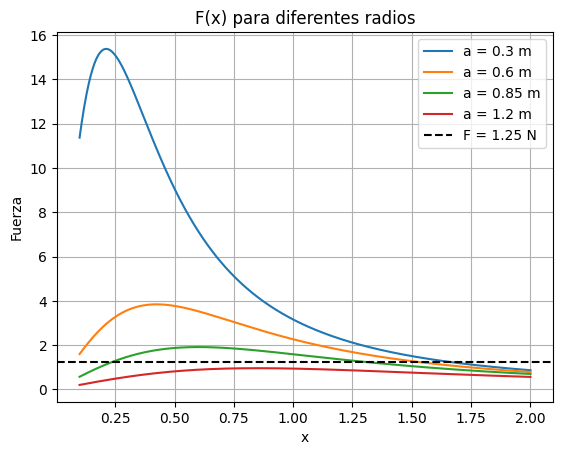

In [12]:
import numpy as np
import matplotlib.pyplot as plt

e0 = 8.854187817e-12
q = 2e-5
Q = 2e-5

def fuerza_anillo(x, a):
    return (1 / (4 * np.pi * e0)) * (q * Q * x) / ((x**2 + a**2)**(3/2))


x_vals = np.linspace(0.1, 2.0, 400)

for a_val in [0.3, 0.6, 0.85, 1.2]:
    F_vals = fuerza_anillo(x_vals, a=a_val)
    plt.plot(x_vals, F_vals, label=f'a = {a_val} m')
print('La fuerza sube en las cercanias del anillo')
plt.axhline(1.25, color='black', linestyle='--', label='F = 1.25 N')
plt.xlabel('x')
plt.ylabel('Fuerza')
plt.title('F(x) para diferentes radios')
plt.legend()
plt.grid(True)
plt.show()


3.

<ipython-input-2-c923d2a5ed18>:10: RuntimeWarning: invalid value encountered in log
  return u * np.log(m0 / (m0 - q * t)) - g * t


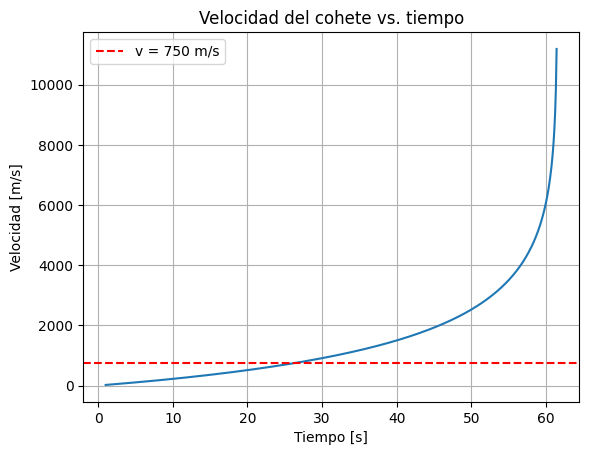

In [2]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.81
m0 = 1.6e5
q = 2600
u = 1800

def velocidad_cohete(t, u=u):
    return u * np.log(m0 / (m0 - q * t)) - g * t
t = np.linspace(1, 100, 1000)
v = velocidad_cohete(t)

plt.plot(t, v)
plt.axhline(750, color='red', linestyle='--', label='v = 750 m/s')
plt.xlabel('Tiempo [s]')
plt.ylabel('Velocidad [m/s]')
plt.title('Velocidad del cohete vs. tiempo')
plt.grid(True)
plt.legend()
plt.show()


In [1]:
import numpy as np

u = 1800
m0 = 1.6e5
q = 2600
g = 9.81

def newton(f, df, x0, tol=1e-4, max_iter=100):
    for _ in range(max_iter):
        f_x0 = f(x0)
        df_x0 = df(x0)
        if df_x0 == 0:
            raise ValueError('Derivada es 0')
        x1 = x0 - f_x0 / df_x0
        if abs(x1 - x0) < tol:
            return x1
        x0 = x1
    raise RuntimeError("No se encontró la raiz en el número de iteraciones dado")
f = lambda x: u * np.log(m0 / (m0 - q * x)) - g * x - 750
df = lambda x: (u * q) / (m0 - q * x) - g
x0 = 25
raiz = newton(f, df, x0)
print(f"El cohete alcanza 750 m/s en t = {raiz:.4f} s")

El cohete alcanza 750 m/s en t = 26.4078 s


In [6]:
u = 1800
m0 = 1.6e5
q = 2600
g = 9.8
def biseccion(f, a, b, tol=1e-8, max_iter=100):
    c_anterior = []
    if f(a) * f(b) >= 0:
        raise ValueError("El intervalo no es válido")
    else:
        for i in range(max_iter):
            c = (a + b) / 2
            c_anterior.append(c)

            if abs(f(c)) < tol:
                return c, c_anterior, i + 1
            elif f(c) * f(a) < 0:
                b = c
            else:
                a = c
        raise RuntimeError(f'No se encontró la raíz después de {max_iter} iteraciones')
f = lambda x: u * np.log(m0 / (m0 - q * x)) - g * x - 750
x=25
raiz, iter_1, err_1 = biseccion(f, 24, 30)
print(f"El cohete alcanza 750 m/s en t = {raiz:.4f} s")

El cohete alcanza 750 m/s en t = 26.4015 s


In [9]:

u = 1800
m0 = 1.6e5
q = 2600
g = 9.8
def regula_falsi(f, a, b, tol=1e-8, max_iter=100):
    c_anterior = []
    if f(a) * f(b) >= 0:
        raise ValueError("El intervalo no es válido")
    else:
        for i in range(max_iter):
            fa = f(a)
            fb = f(b)
            c = b - fb * (b - a) / (fb - fa)
            fc = f(c)
            c_anterior.append(c)

            if abs(f(c)) < tol:
                return c, c_anterior, i + 1
            elif f(c) * f(a) < 0:
                b = c
            else:
                a = c
        raise RuntimeError(f'No se encontró la raíz después de {max_iter} iteraciones')
f = lambda x: u * np.log(m0 / (m0 - q * x)) - g * x - 750
x=25
raiz, iter_1, err_1 = regula_falsi(f, 24, 30)
print(f"El cohete alcanza 750 m/s en t = {raiz:.4f} s")

El cohete alcanza 750 m/s en t = 26.4015 s


In [11]:
import numpy as np
m0 = 1.6e5
q = 2600
g = 9.8

def biseccion(f, a, b, tol=1e-8, max_iter=100):
    c_anterior = []
    if f(a) * f(b) >= 0:
        raise ValueError("El intervalo no es válido")
    else:
        for i in range(max_iter):
            c = (a + b) / 2
            c_anterior.append(c)
            if abs(f(c)) < tol:
                return c, c_anterior, i + 1
            elif f(c) * f(a) < 0:
                b = c
            else:
                a = c
        raise RuntimeError(f'No se encontró la raíz después de {max_iter} iteraciones')

def velocidad_cohete(t, u):
    return u * np.log(m0 / (m0 - q * t)) - g * t

u_vals = np.linspace(500, 2000, 20)
tiempos = []

for u in u_vals:
    f_objetivo = lambda t: velocidad_cohete(t, u) - 750
    raiz,_,_ = biseccion(f_objetivo, 1, 60)
    tiempos.append((u, raiz))
for u, t in tiempos:
    if t is not None:
        print(f"Para u = {u:.0f} m/s, el cohete alcanza 750 m/s en t = {t:.4f} s")

Para u = 500 m/s, el cohete alcanza 750 m/s en t = 57.0501 s
Para u = 579 m/s, el cohete alcanza 750 m/s en t = 54.8849 s
Para u = 658 m/s, el cohete alcanza 750 m/s en t = 52.5403 s
Para u = 737 m/s, el cohete alcanza 750 m/s en t = 50.1203 s
Para u = 816 m/s, el cohete alcanza 750 m/s en t = 47.7027 s
Para u = 895 m/s, el cohete alcanza 750 m/s en t = 45.3419 s
Para u = 974 m/s, el cohete alcanza 750 m/s en t = 43.0738 s
Para u = 1053 m/s, el cohete alcanza 750 m/s en t = 40.9197 s
Para u = 1132 m/s, el cohete alcanza 750 m/s en t = 38.8907 s
Para u = 1211 m/s, el cohete alcanza 750 m/s en t = 36.9903 s
Para u = 1289 m/s, el cohete alcanza 750 m/s en t = 35.2171 s
Para u = 1368 m/s, el cohete alcanza 750 m/s en t = 33.5667 s
Para u = 1447 m/s, el cohete alcanza 750 m/s en t = 32.0325 s
Para u = 1526 m/s, el cohete alcanza 750 m/s en t = 30.6073 s
Para u = 1605 m/s, el cohete alcanza 750 m/s en t = 29.2833 s
Para u = 1684 m/s, el cohete alcanza 750 m/s en t = 28.0528 s
Para u = 1763 m